# **House Prices - Advanced Regression Techniques**

O objetivo é prever os preços de venda e pratique engenharia de atributos, florestas aleatórias (RFs) e aumento de gradiente (gradient boosting).

## **Descrição da Competição**

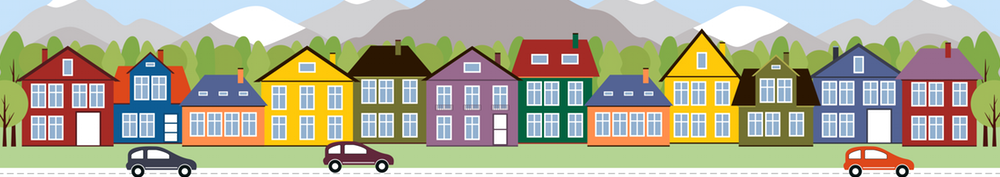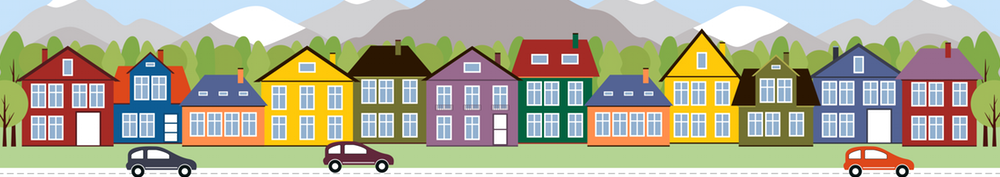

Peça a um comprador de imóveis para descrever sua casa dos sonhos, e provavelmente ele não começará pela altura do teto do porão ou pela proximidade de uma ferrovia leste-oeste. Mas o conjunto de dados desta competição prática prova que muito mais influência as negociações de preço do que o número de quartos ou uma cerca branca.

Com 79 variáveis explicativas que descrevem (quase) todos os aspectos de casas residenciais em Ames, Iowa, esta competição desafia você a prever o preço final de cada casa.

## **Habilidades práticas**

* Engenharia de recursos criativos
* Técnicas avançadas de regressão, como floresta aleatória e aumento de gradiente

## **Avaliação**

### **Objetivo**

Sua tarefa é prever o preço de venda de cada casa. Para cada Id no conjunto de teste, você deve prever o valor da variável SalePrice.

### **Métrica**

As submissões são avaliadas pelo Erro Quadrático Médio (RMSE) entre o logaritmo do valor previsto e o logaritmo do preço de venda observado. (Tomar logaritmos significa que erros na previsão de casas caras e baratas terão o mesmo impacto no resultado.)

### **Formato do Arquivo de Submissão**

O arquivo deve conter um cabeçalho e ter o seguinte formato:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```
## **Descrição dos Campos**

**SalePrice:** o preço de venda da propriedade em dólares. Esta é a variável alvo que você está tentando prever.\
**MSSubClass:** A classe do edifício.\
**MSZoning:** A classificação geral de zoneamento.\
**LotFrontage:** Metros lineares de rua conectados à propriedade.\
**LotArea:** Tamanho do lote em metros quadrados.\
**Street:** Tipo de acesso à rua.\
**Alley:** Tipo de acesso à viela.\
**LotShape:** Forma geral da propriedade.\
**LandContour:** Planicidade da propriedade.\
**Utilities:** Tipo de utilidades disponíveis.\
**LotConfig:** Configuração do lote.\
**LandSlope:** Inclinação da propriedade.\
**Neighborhood:** Localizações físicas dentro dos limites da cidade de Ames.\
**Condition1:** Proximidade de uma estrada principal ou ferrovia.\
**Condition2:** Proximidade de uma estrada principal ou ferrovia (se houver uma segunda).\
**BldgType:** Tipo de moradia.\
**HouseStyle:** Estilo de moradia.\
**OverallQual:** Qualidade geral do material e acabamento.\
**OverallCond:** Classificação geral da condição.\
**YearBuilt:** Data de construção original.\
**YearRemodAdd:** Data da reforma.\
**RoofStyle:** Tipo de telhado.\
**RoofMatl:** Material do telhado.\
**Exterior1st:** Revestimento exterior da casa.\
**Exterior2nd:** Revestimento exterior da casa (se houver mais de um material).\
**MasVnrType:** Tipo de revestimento de alvenaria.\
**MasVnrArea:** Área de revestimento de alvenaria em metros quadrados.\
**ExterQual:** Qualidade do material exterior.\
**ExterCond:** Condição atual do material exterior.\
**Foundation:** Tipo de fundação.\
**BsmtQual:** Altura do porão.\
**BsmtCond:** Condição geral do porão.\
**BsmtExposure:** Paredes do porão com acesso ao nível do jardim ou saída.\
**BsmtFinType1:** Qualidade da área acabada do porão.\
**BsmtFinSF1:** Metros quadrados da área acabada do tipo 1 no porão.\
**BsmtFinType2:** Qualidade da segunda área acabada (se houver).\
**BsmtFinSF2:** Metros quadrados da segunda área acabada no porão.\
**BsmtUnfSF:** Metros quadrados de área não acabada no porão.\
**TotalBsmtSF:** Total de metros quadrados do porão.\
**Heating:** Tipo de aquecimento.\
**HeatingQC:** Qualidade e condição do aquecimento.\
**CentralAir:** Ar condicionado central.\
**Electrical:** Sistema elétrico.\
**1stFlrSF:** Metros quadrados do primeiro andar.\
**2ndFlrSF:** Metros quadrados do segundo andar.\
**LowQualFinSF:** Metros quadrados acabados de baixa qualidade (todos os andares).\
**GrLivArea:** Metros quadrados da área habitável acima do solo.\
**BsmtFullBath:** Banheiros completos no porão.\
**BsmtHalfBath:** Banheiros de meio andar no porão.\
**FullBath:** Banheiros completos acima do solo.\
**HalfBath:** Banheiros de meio andar acima do solo.\
**Bedroom:** Número de quartos acima do nível do porão.\
**Kitchen:** Número de cozinhas.\
**KitchenQual:** Qualidade da cozinha.\
**TotRmsAbvGrd:** Total de cômodos acima do solo (não inclui banheiros).\
**Functional:** Classificação da funcionalidade da casa.\
**Fireplaces:** Número de lareiras.\
**FireplaceQu:** Qualidade da lareira.\
**GarageType:** Localização da garagem.\
**GarageYrBlt:** Ano em que a garagem foi construída.\
**GarageFinish:** Acabamento interior da garagem.\
**GarageCars:** Capacidade da garagem em número de carros.\
**GarageArea:** Tamanho da garagem em metros quadrados.\
**GarageQual:** Qualidade da garagem.\
**GarageCond:** Condição da garagem.\
**PavedDrive:** Entrada pavimentada.\
**WoodDeckSF:** Área do deque de madeira em metros quadrados.\
**OpenPorchSF:** Área da varanda aberta em metros quadrados.\
**EnclosedPorch:** Área da varanda fechada em metros quadrados.\
**3SsnPorch:** Área da varanda de três estações em metros quadrados.\
**ScreenPorch:** Área da varanda com tela em metros quadrados.\
**PoolArea:** Área da piscina em metros quadrados.\
**PoolQC:** Qualidade da piscina.\
**Fence:** Qualidade da cerca.\
**MiscFeature:** Característica adicional não coberta por outras categorias.\
**MiscVal:** Valor em dólares da característica adicional.
**MoSold:** Mês de venda.\
**YrSold:** Ano de venda.\
**SaleType:** Tipo de venda.\
**SaleCondition:** Condição da venda.




In [1]:
# importações da biblioteca
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
import missingno as msno

In [3]:
# importando os dados
caminho = r"C:\Users\jherfson\Documents\Projeto\coderHouse\pratica_House_Prices\dados"

arquivo_train = os.path.join(caminho, 'train.csv')
arquivo_test = os.path.join(caminho, 'test.csv')

train_df = pd.read_csv(arquivo_train)
test_df = pd.read_csv(arquivo_test)


all_df = pd.concat((train_df.loc[:, :], test_df.loc[:, :]))
all_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
# Análise estatistico dos dados
all_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [7]:
all_df.shape

(2919, 81)

## **Analise dos dados faltantes**

Análise dos campos que estão nulos

In [8]:
all_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

<AxesSubplot: >

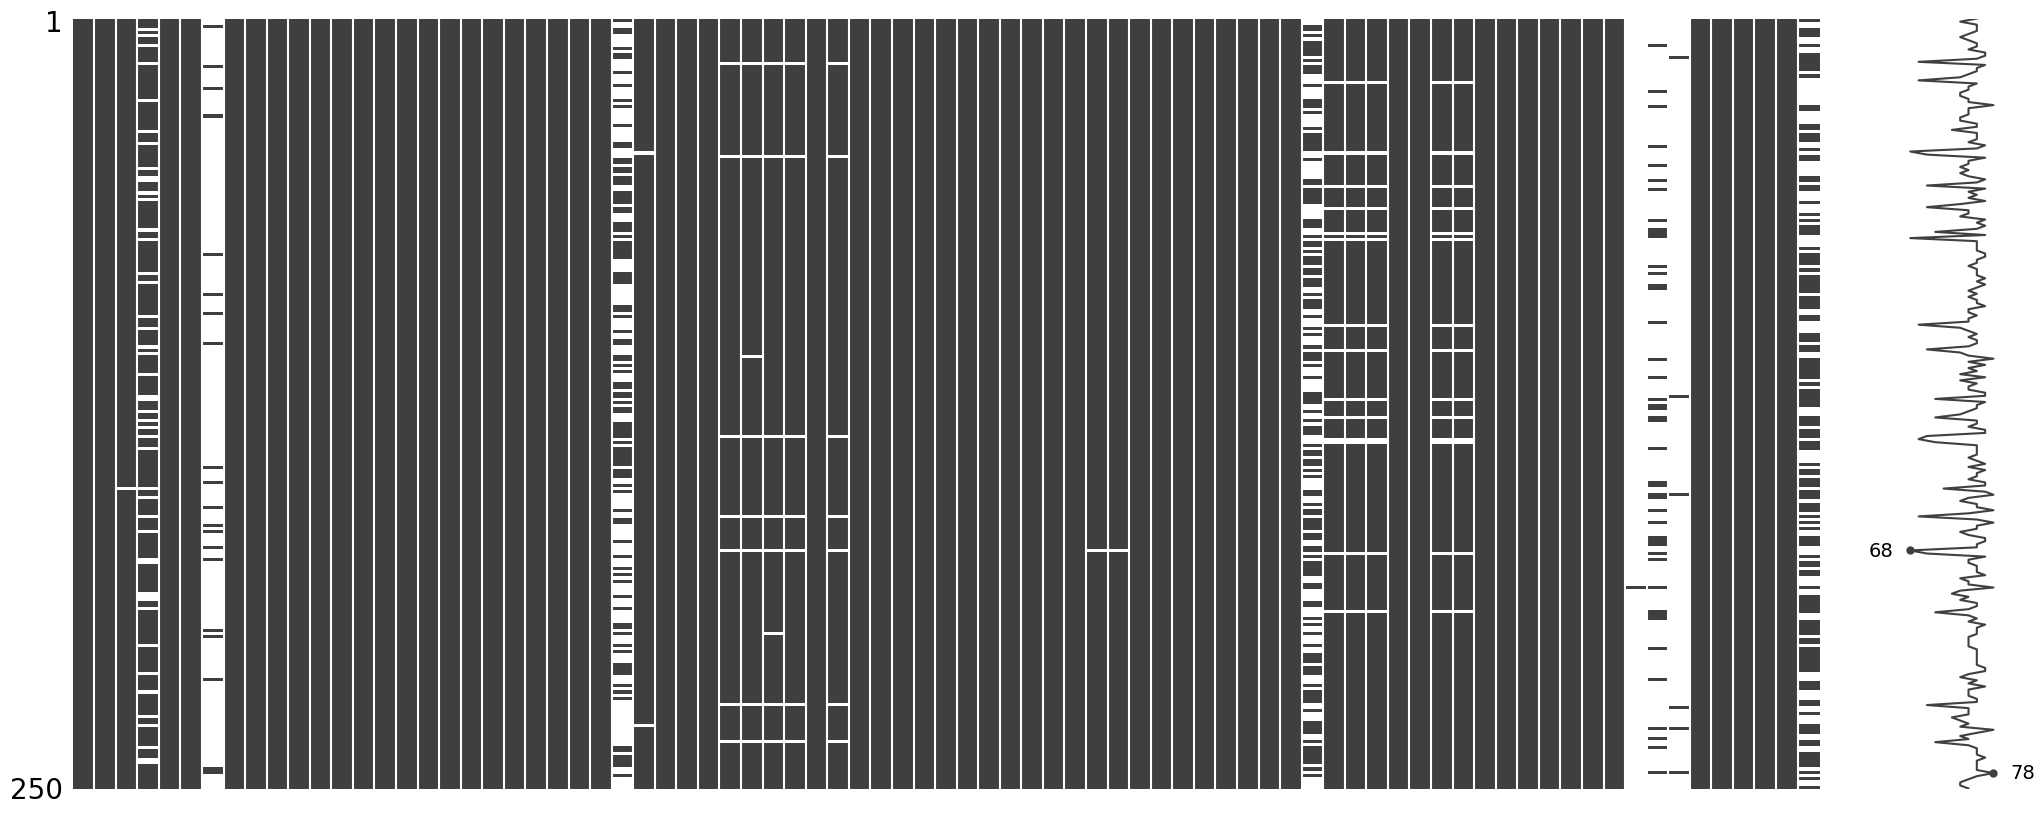

In [9]:
%matplotlib inline
msno.matrix(all_df.sample(250))

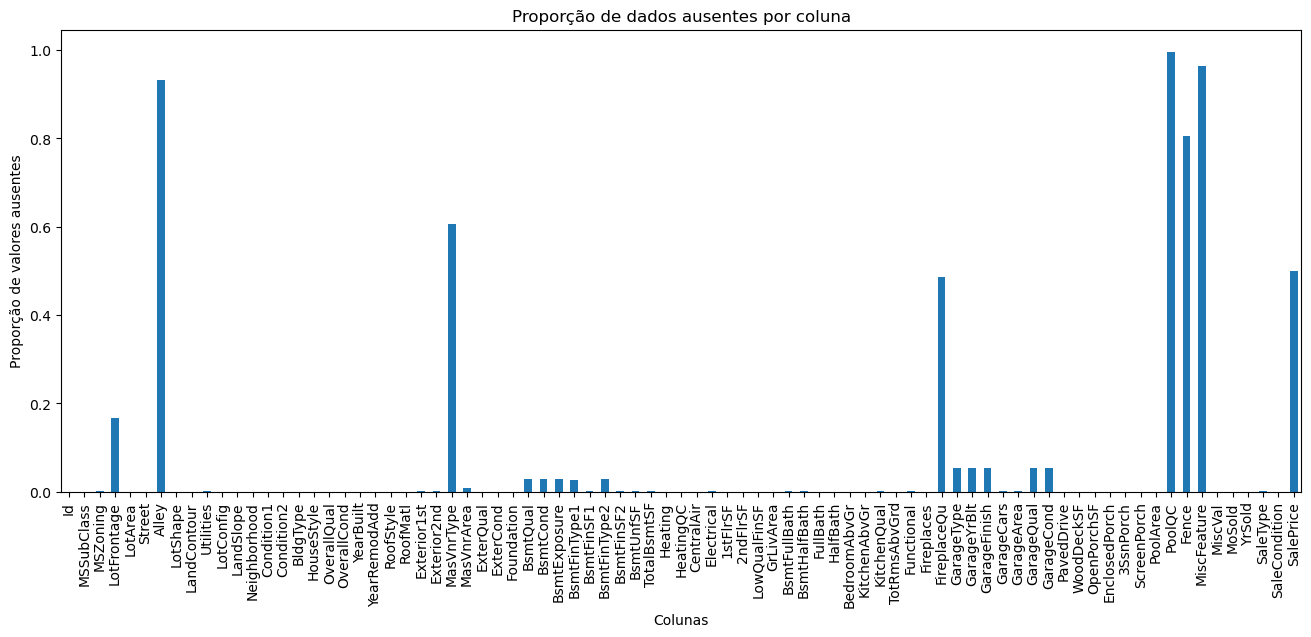

In [10]:
fig, ax = plt.subplots(figsize=(16, 6))
all_df.isnull().mean().abs().plot.bar(ax=ax)
ax.set_title('Proporção de dados ausentes por coluna')
ax.set_xlabel('Colunas')
ax.set_ylabel('Proporção de valores ausentes')
plt.show()

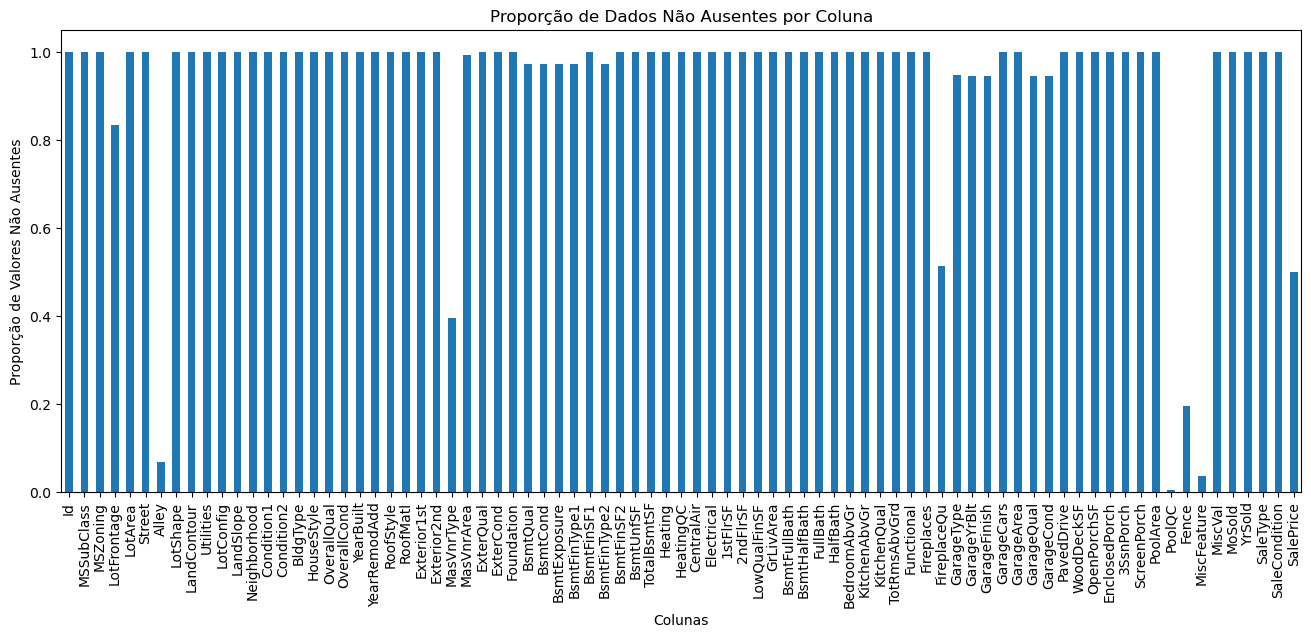

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 6))

(1 - all_df.isnull().mean()).plot.bar(ax=ax)

ax.set_title('Proporção de Dados Não Ausentes por Coluna')
ax.set_xlabel('Colunas')
ax.set_ylabel('Proporção de Valores Não Ausentes')
plt.show()

<AxesSubplot: >

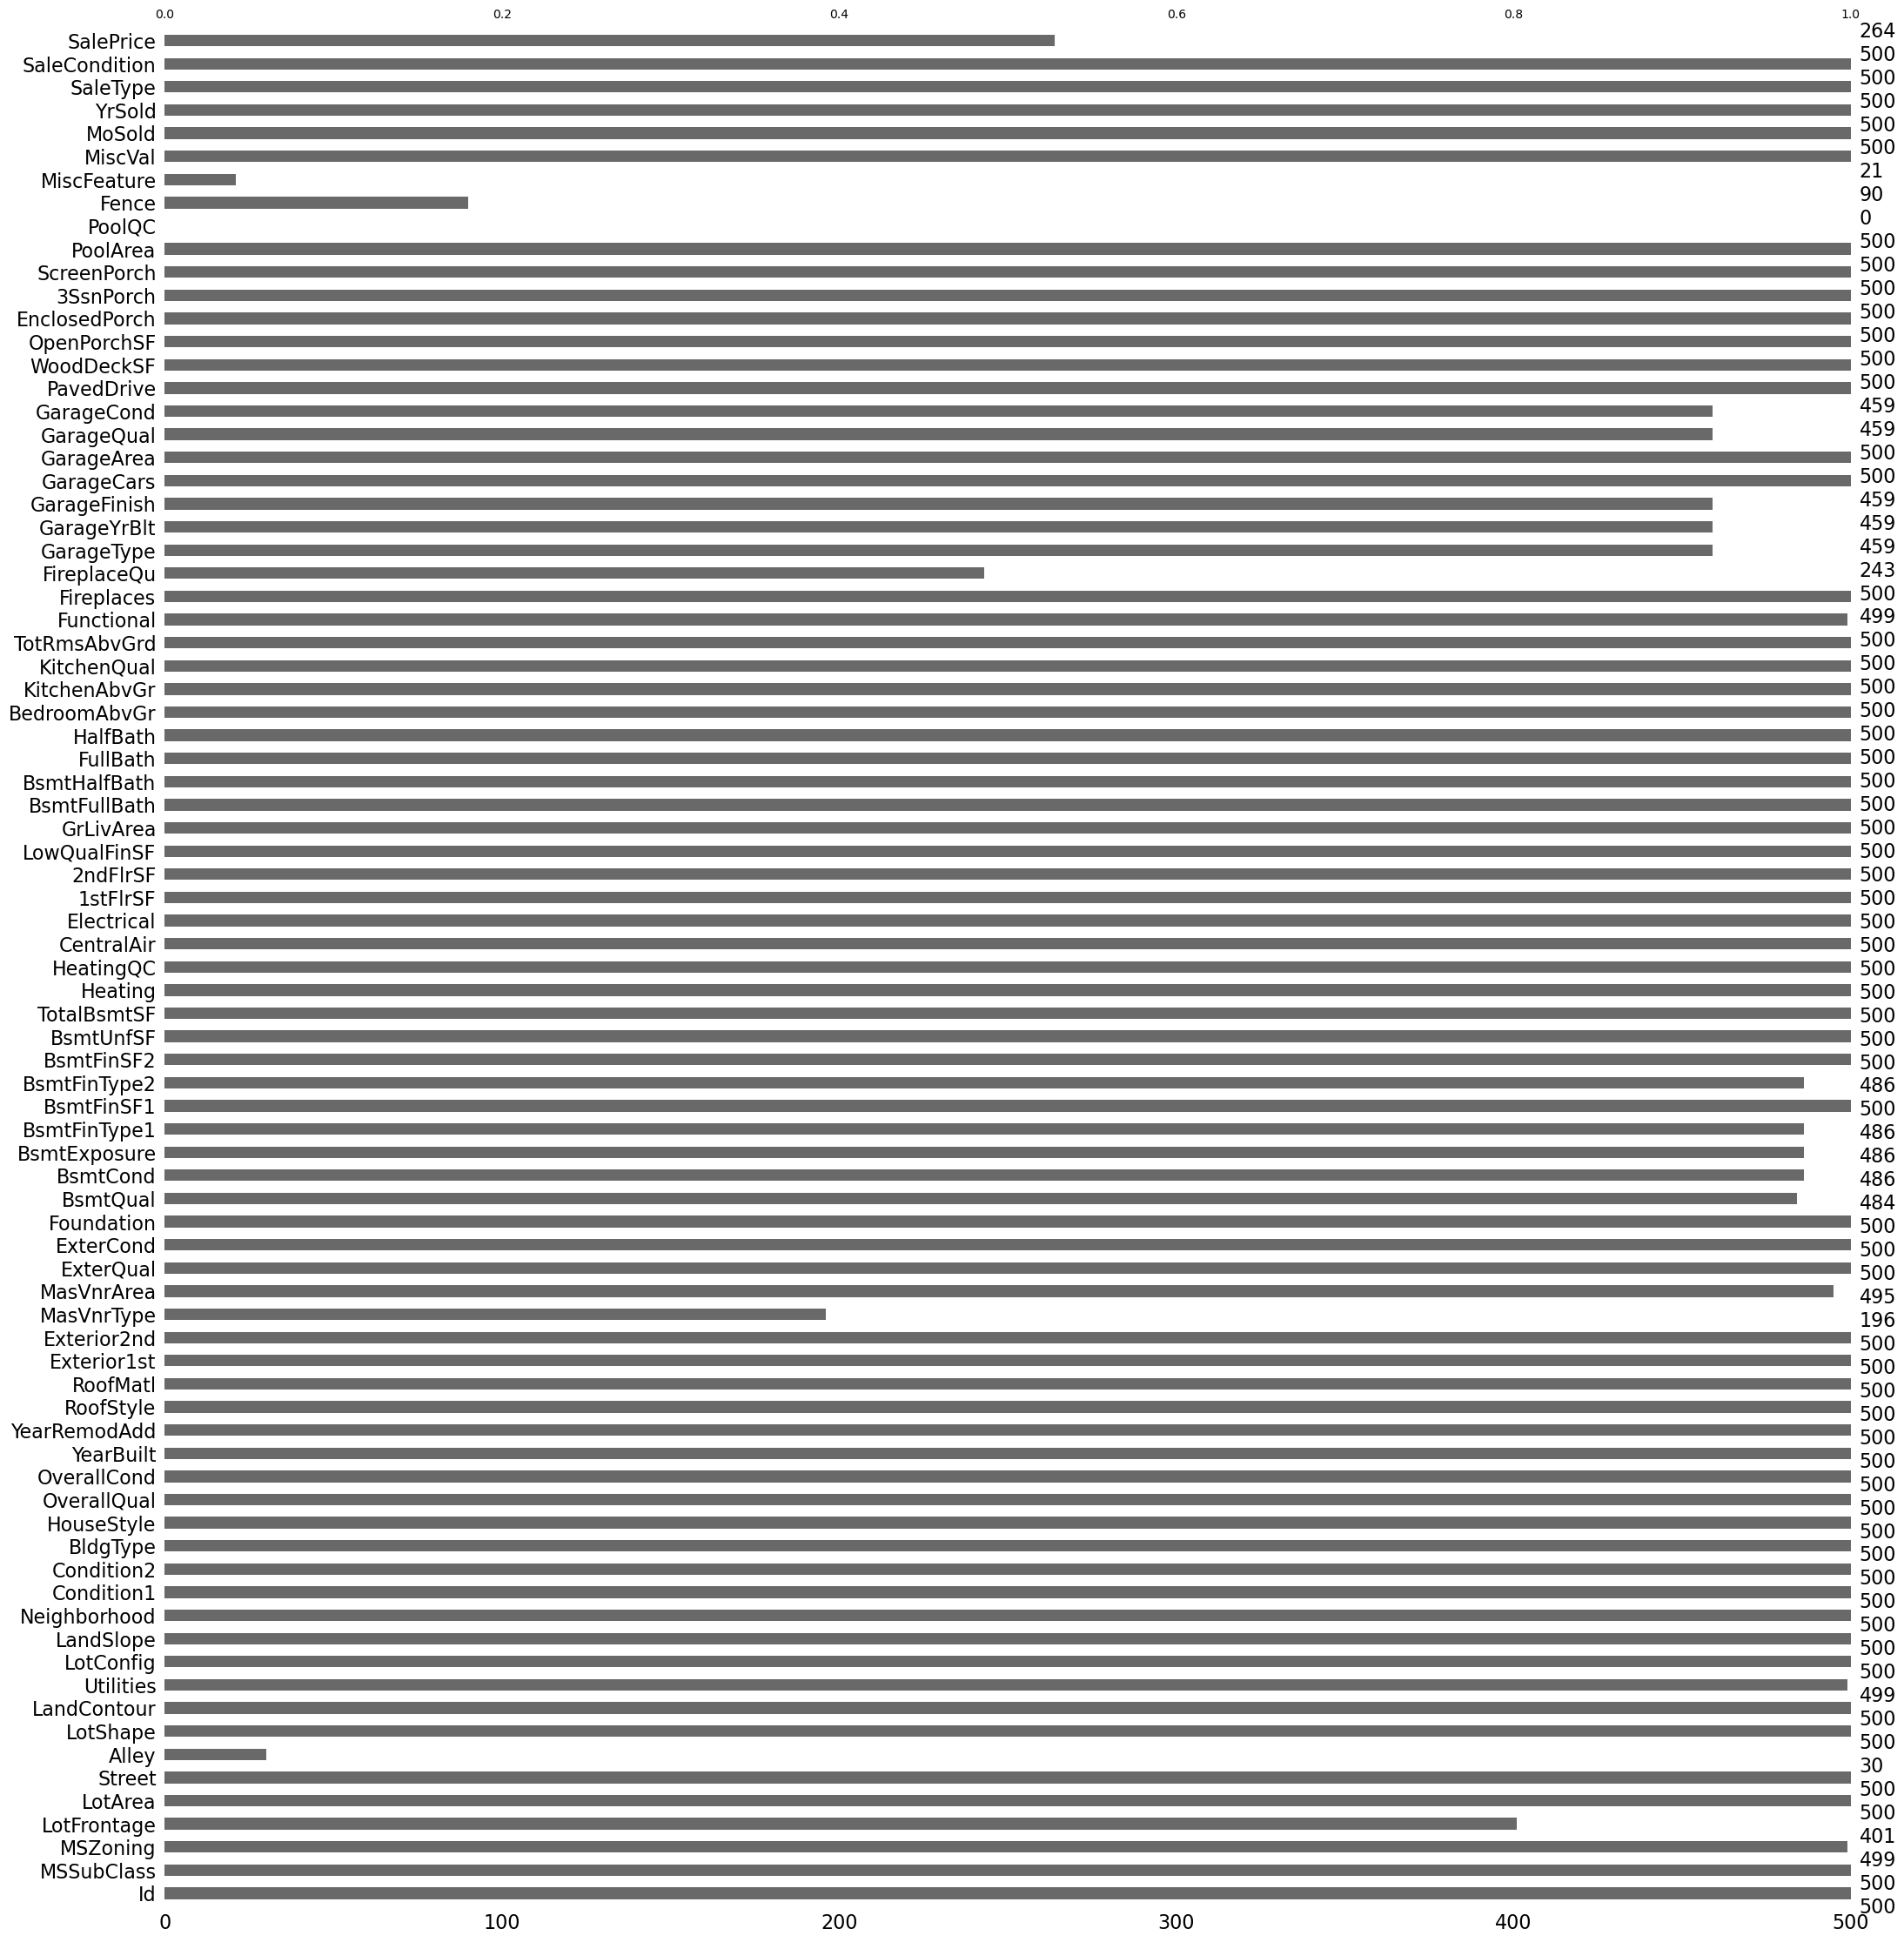

In [14]:
msno.bar(all_df.sample(500))